In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/irisnexus/Iris.csv


In [22]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Reading the csv file
df = pd.read_csv('/kaggle/input/irisnexus/Iris.csv')
df.shape

(150, 6)

In [4]:
# Displaying first 10 rows of the dataset
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
# Getting basic information like datatype for each column and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Getting basic mathematical analysis
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Check for NaN values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Removing unnecesary coulmns from the dataset 
df.drop(columns=['Id'], axis = 1, inplace = True)

In [9]:
# Checking unique values in each columns
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [10]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

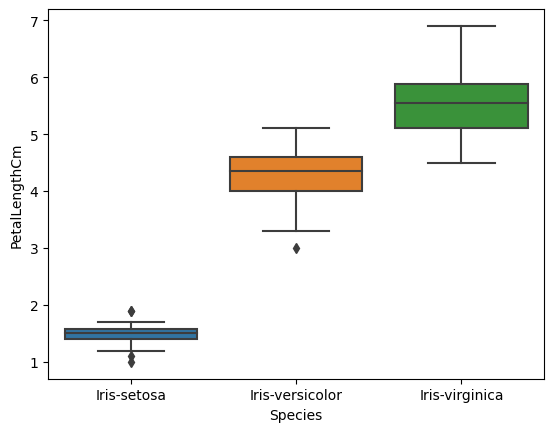

In [12]:
# Univariate Analysis: observing distribution of data values and outliers
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

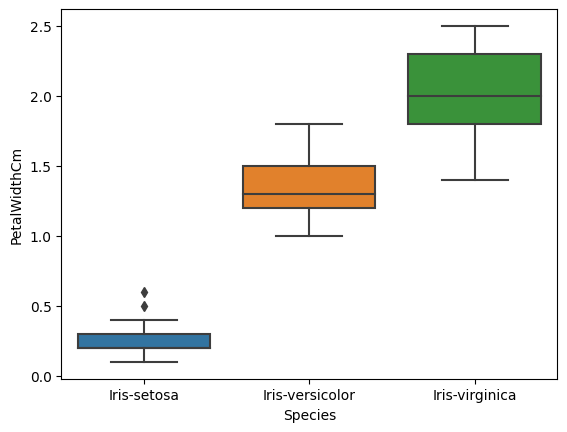

In [13]:
sns.boxplot(x="Species", y="PetalWidthCm", data=df)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

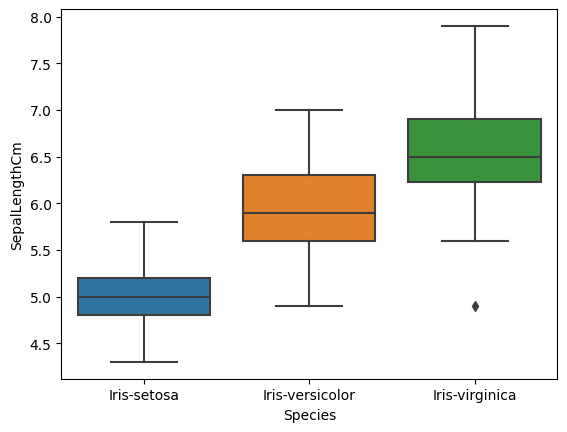

In [14]:
sns.boxplot(x="Species", y="SepalLengthCm", data=df)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

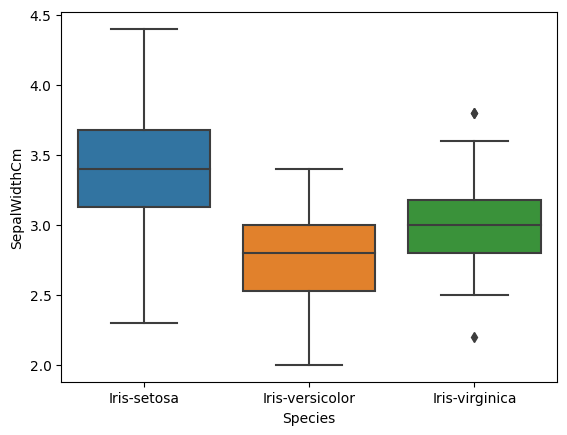

In [15]:
sns.boxplot(x="Species", y="SepalWidthCm", data=df)

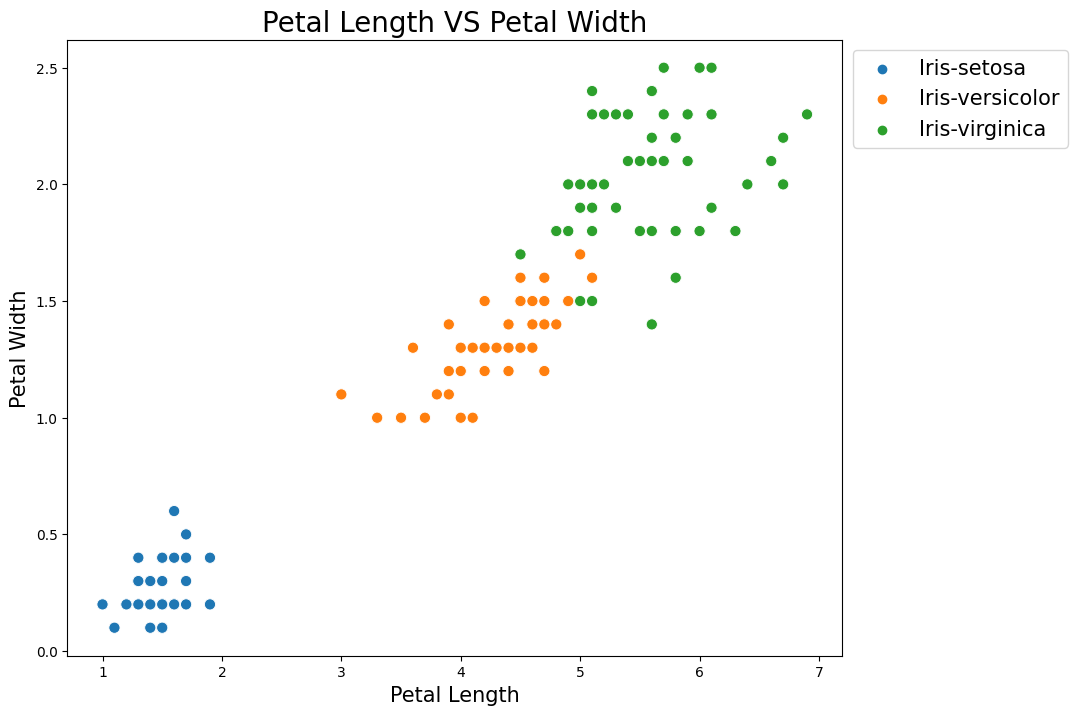

In [16]:
#Bivariate Analysis

plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = df, s = 65)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, fontsize = 15)
plt.title('Petal Length VS Petal Width', fontsize = 20)
plt.xlabel('Petal Length', fontsize = 15)
plt.ylabel('Petal Width', fontsize = 15)
plt.show()

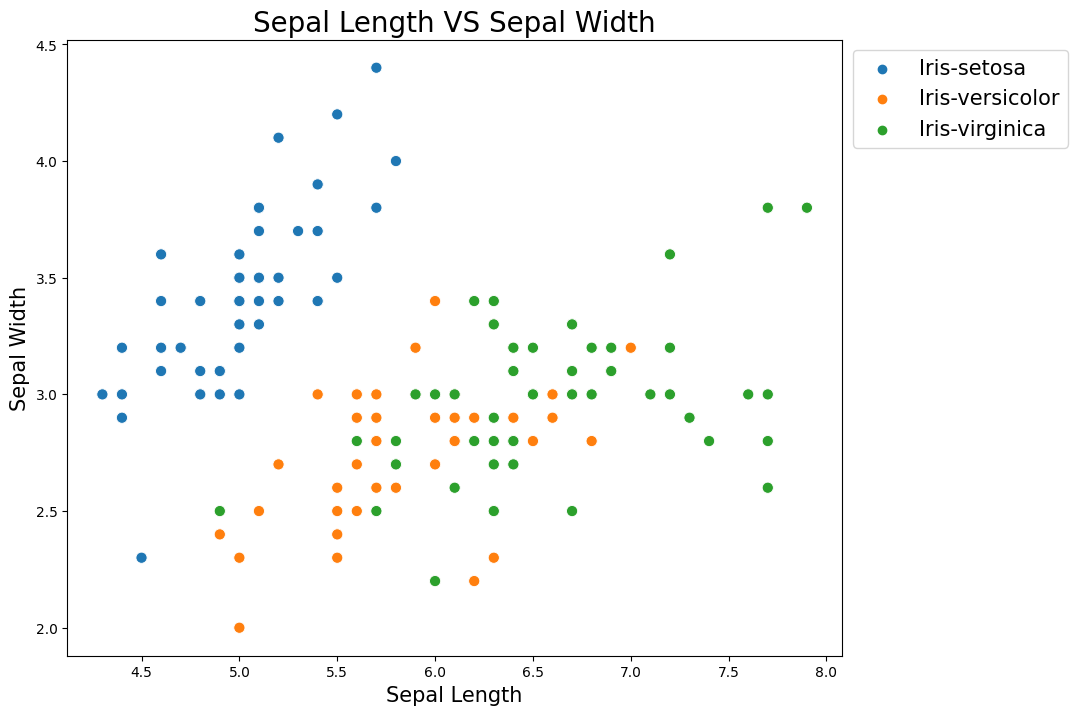

In [17]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = df, s = 65)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, fontsize = 15)
plt.title('Sepal Length VS Sepal Width', fontsize = 20)
plt.xlabel('Sepal Length', fontsize = 15)
plt.ylabel('Sepal Width', fontsize = 15)
plt.show()

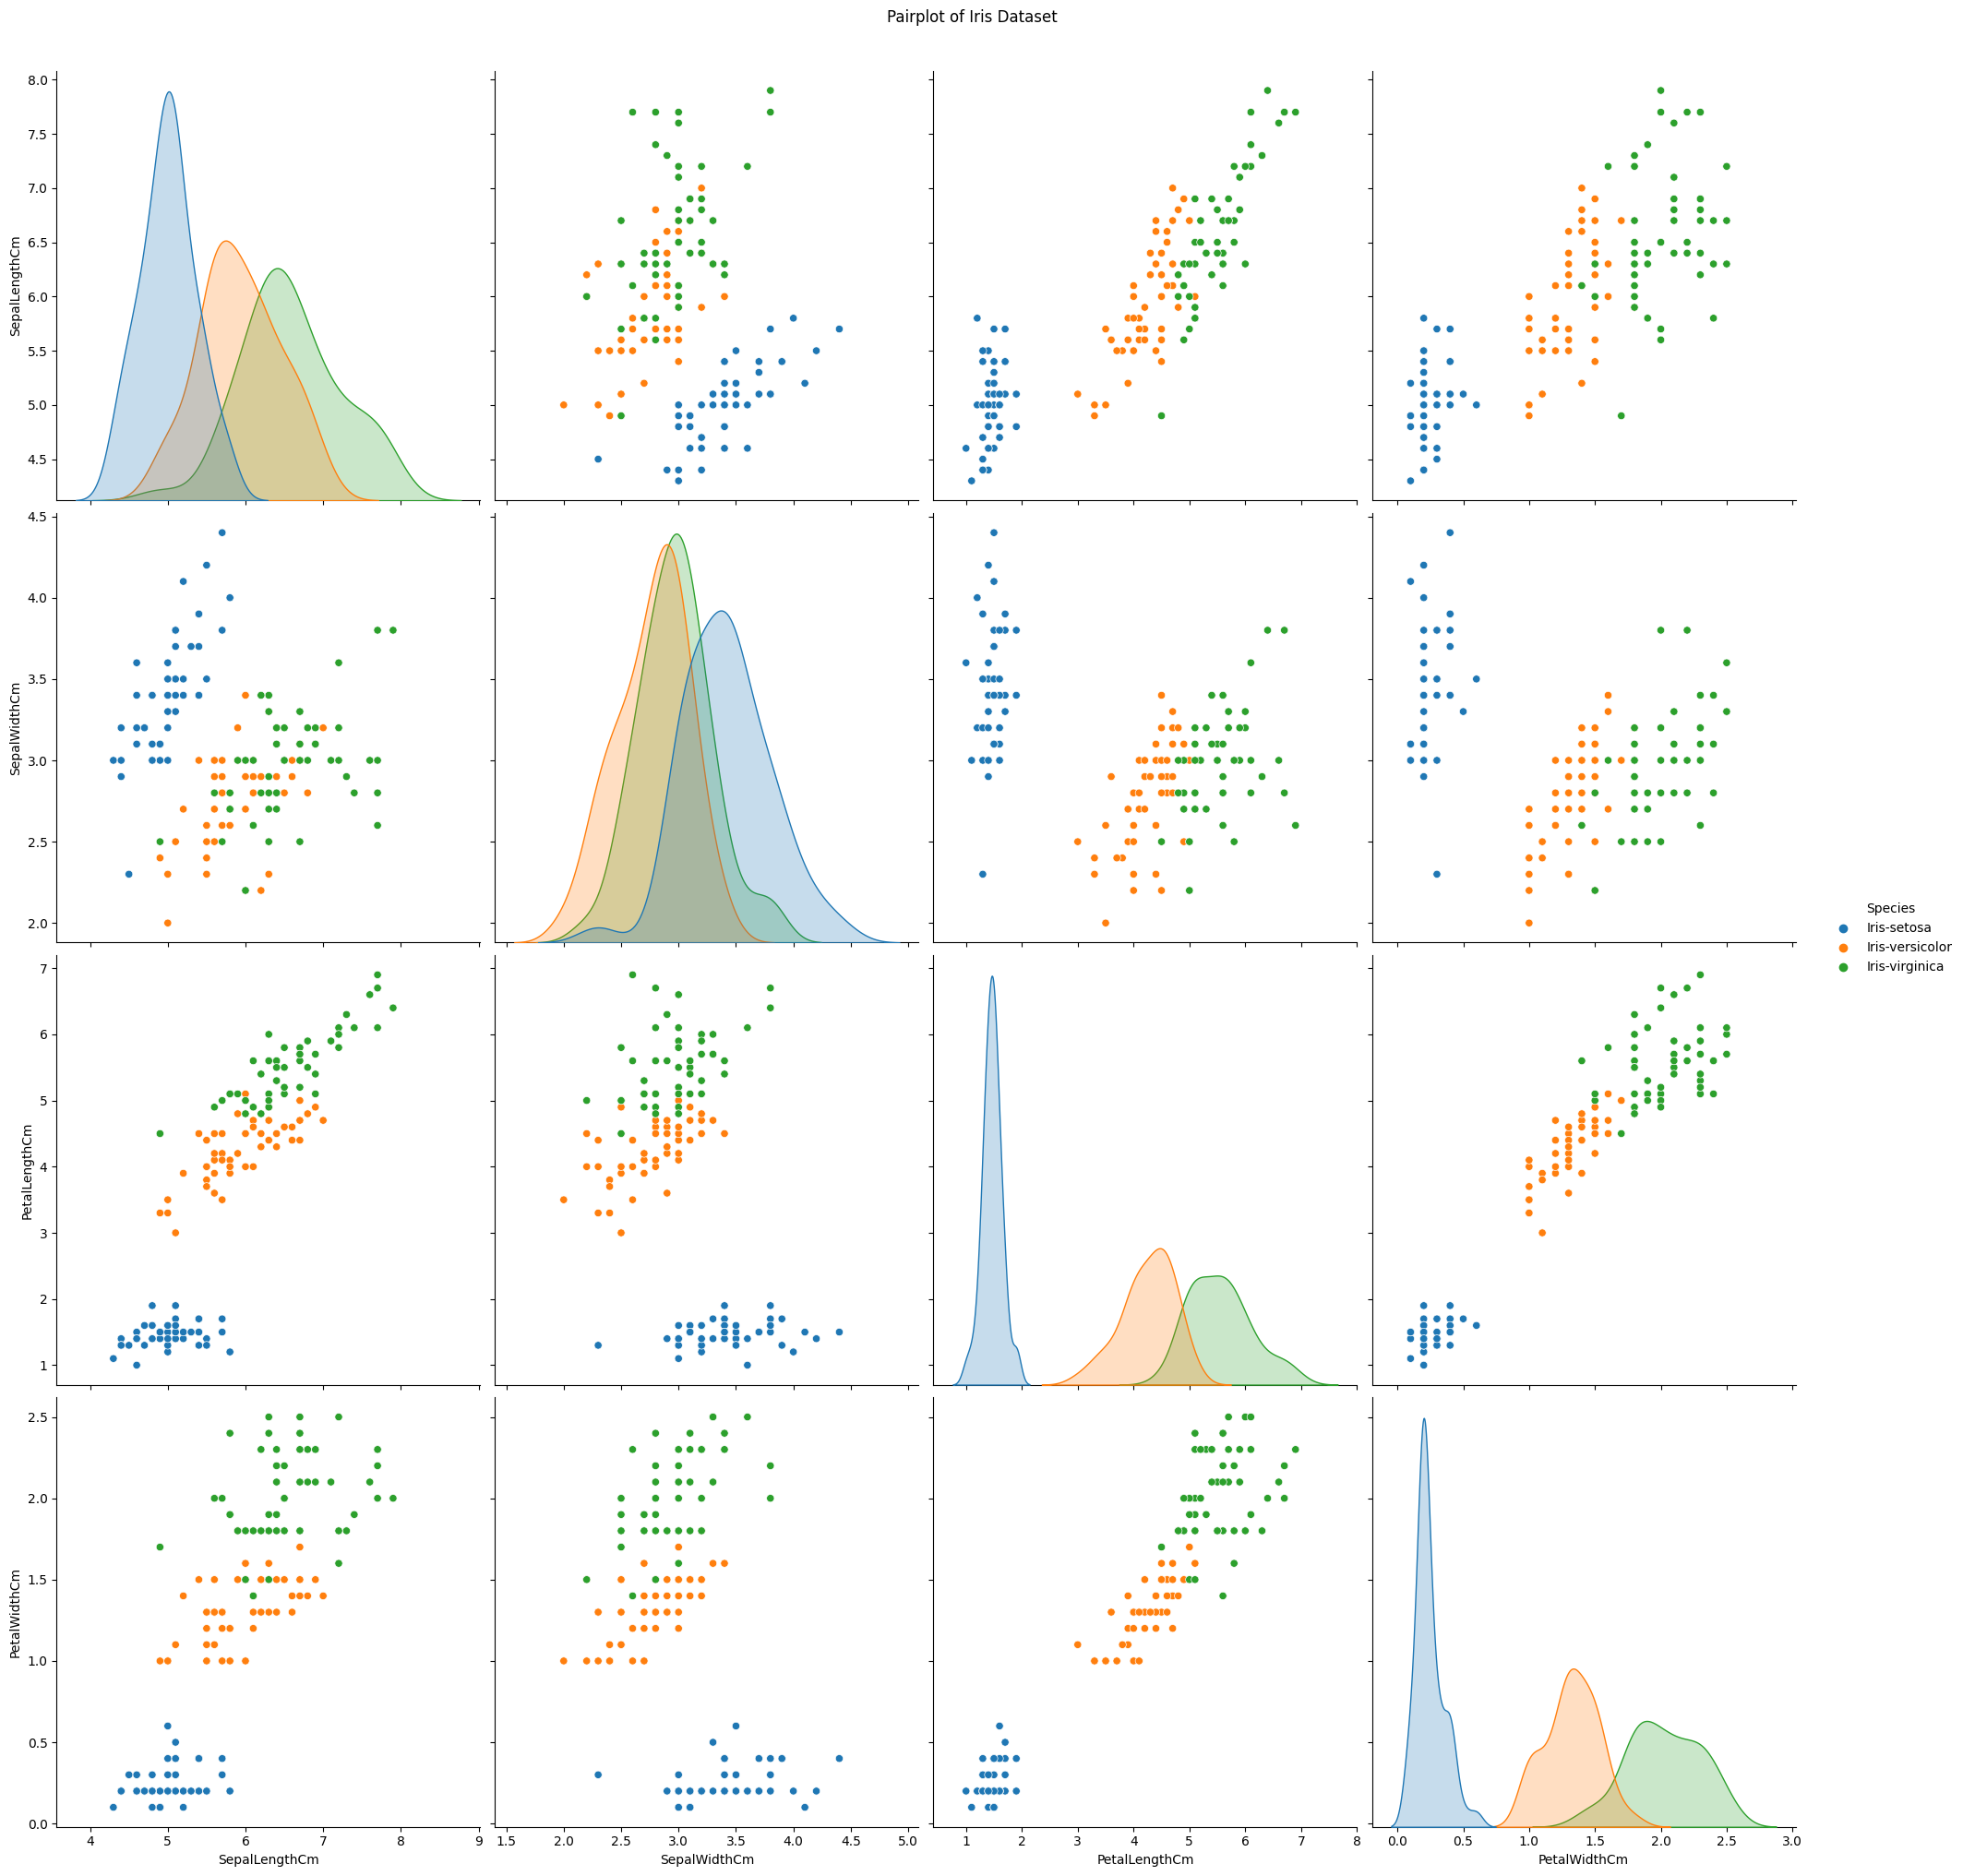

In [18]:
# Multivariate Analysis

sns.pairplot(df, hue = 'Species', height = 5)
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

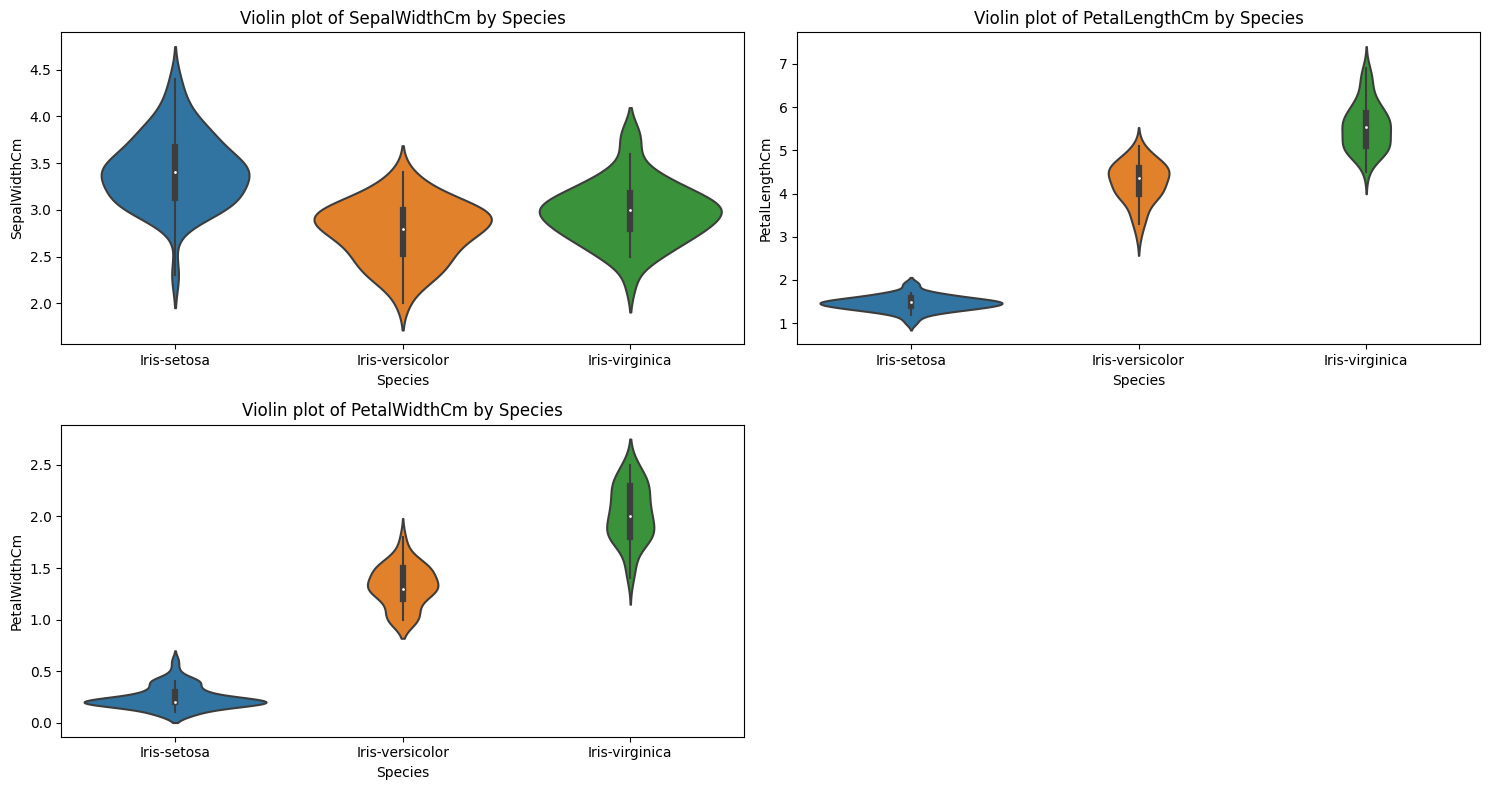

In [19]:
# Violin plot for each feature by Species

plt.figure(figsize=(15, 8))
for i, feature in enumerate(df.columns[1:4]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='Species', y=feature, data=df)
    plt.title(f"Violin plot of {feature} by Species")

plt.tight_layout()
plt.show()

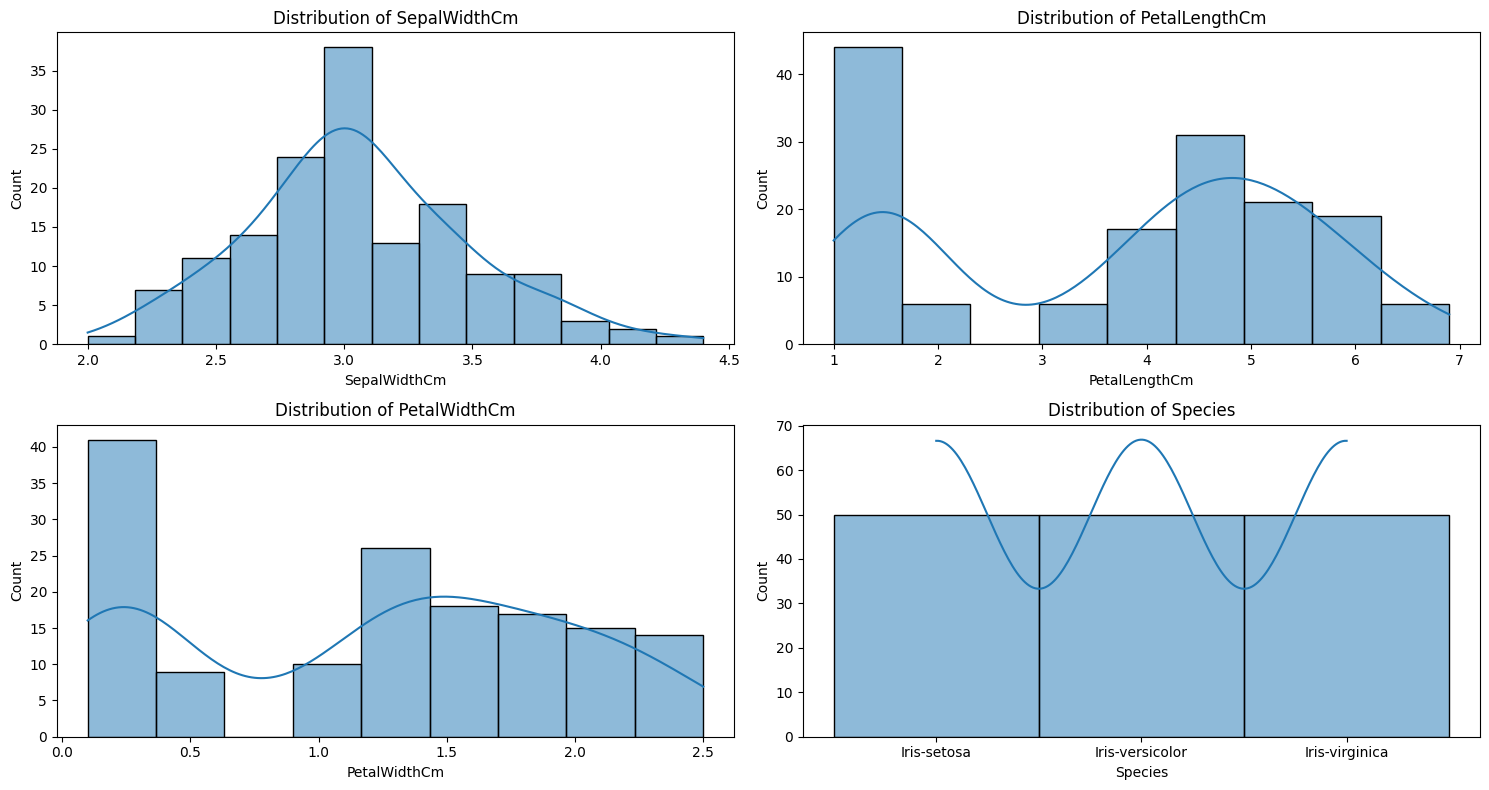

In [20]:
# Distribution plots for each feature

plt.figure(figsize=(15, 8))
for i, feature in enumerate(df.columns[1:5]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

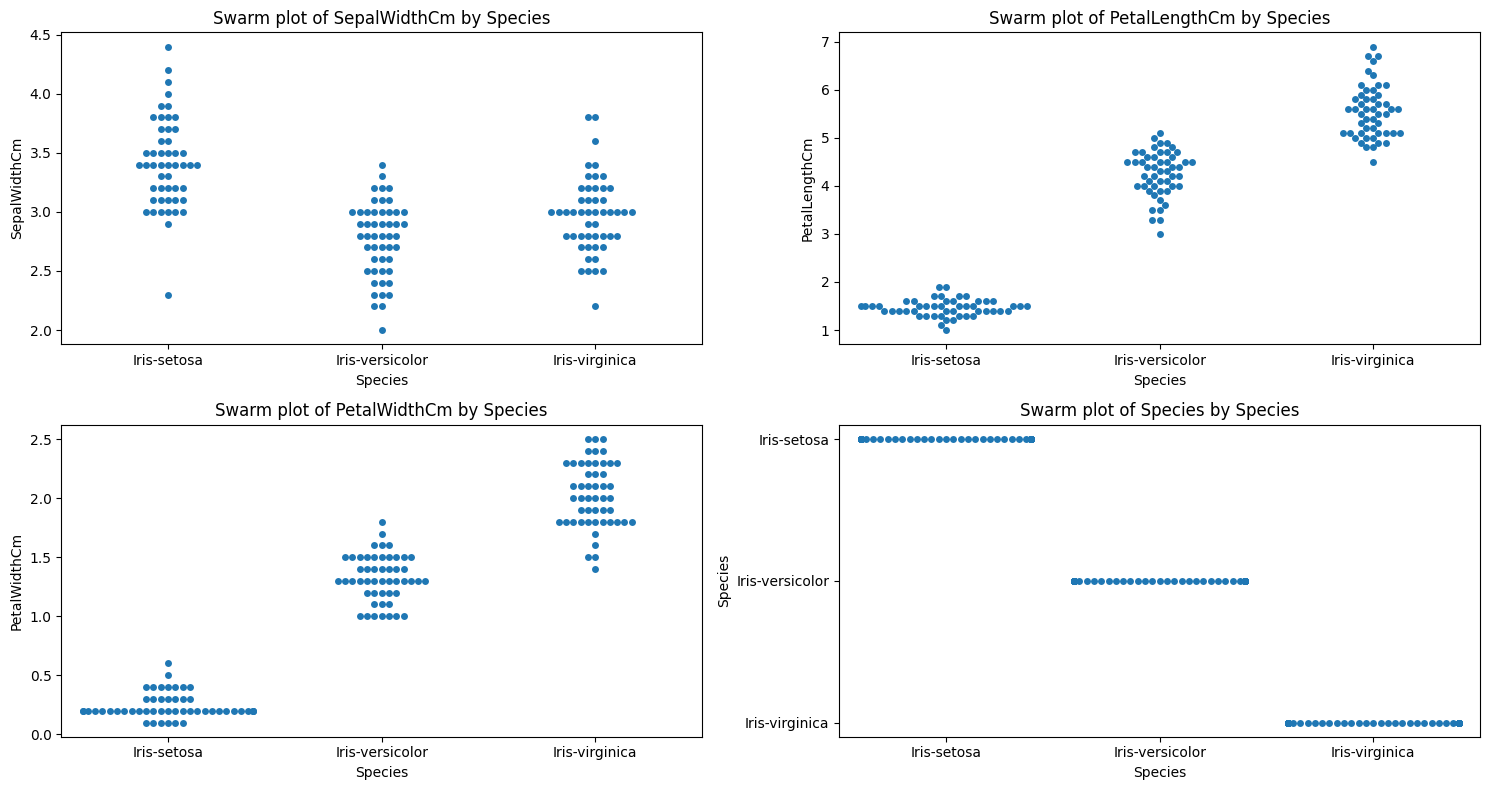

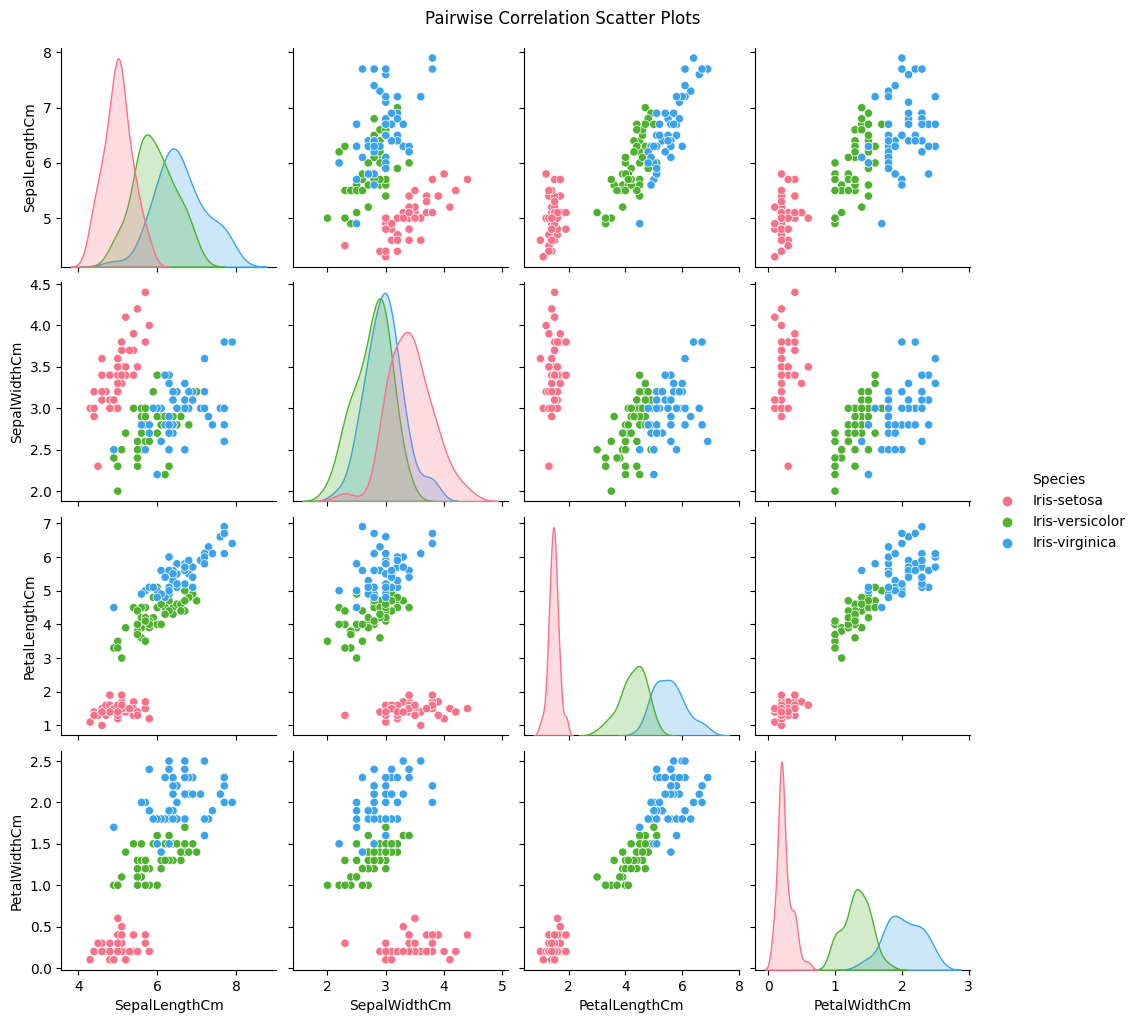

In [23]:
# Swarm plot for each feature by Species
plt.figure(figsize=(15, 8))
for i, feature in enumerate(df.columns[1:5]):
    plt.subplot(2, 2, i + 1)
    sns.swarmplot(x='Species', y=feature, data=df)
    plt.title(f"Swarm plot of {feature} by Species")

plt.tight_layout()
plt.show()

# Pairwise correlation scatter plots
sns.pairplot(df, diag_kind="kde", markers="o", hue="Species", palette="husl")
plt.suptitle("Pairwise Correlation Scatter Plots", y=1.02)
plt.show()